<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Fortune_BigHomework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### HW 1: Download the dataset

https://www.kaggle.com/kavita5/twitter-dataset-avengersendgame/download

In [13]:
%cd BHW2_files
!ls

/Users/fortune/code/personal/DS/M4/BHW2_files
config.yaml data        experiments


/Users/fortune/code/personal/DS/M4/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [14]:
import pandas as pd
avengers_df = pd.read_csv('data/tweets.csv', encoding='utf-8', encoding_errors='ignore')
avengers_df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: im emotional, sorry!!\r\n\r\n...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n\r\n...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


#### HW 2: Create Target column from retweetCount >np.median[retweetCount] create dataset in .csv file with new features along with .yaml file with it's descritpion, median[retweetCount] value stored in retweetCount_median variable, preferably store data in data folder

In [21]:
!mkdir -p data/exp_hw2 experiments/exp_hw2
retweetCount_median = avengers_df["retweetCount"].median()
avengers_df["Target"] = avengers_df["retweetCount"] > retweetCount_median
avengers_df.to_csv('data/exp_hw2/tweets_with_target.csv', index=False)

yaml_content = f"""
name: Avengers
description: Avengers dataset with target column
retweetCountMedian: {retweetCount_median}
"""

%store yaml_content >experiments/exp_hw2/exp_hw2.yaml

Writing 'yaml_content' (str) to file 'experiments/exp_hw2/exp_hw2.yaml'.


#### HW 3: Сreate a folder with experiments, make it a python package, organize all transformers and classifiers wih python modules and .yaml files.

In [25]:
!find ./experiments

./experiments
./experiments/exp_hw2
./experiments/exp_hw2/exp_hw2.yaml
./experiments/__init__.py


#### HW 4: Extract names of avengers endgame characters from text

Examples of tags in quetion:
#Thanos
#WinterSoldier
#CaptainAmerica
#blackwidow
#CaptainMarvel
#Mantis

store the resulting dataset in data folder with .yaml description, preferable naming for variable names is lowercase name of the tag

In [39]:
import re
unique_tags = set()
def get_tags(text):
    tags = [tag.lower() for tag in re.findall(r"#(\w+)", text)]
    unique_tags.update(tags)
    return tags

avengers_df["tags"] = avengers_df["text"].apply(get_tags)
avengers_df.head()


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Target,tags
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN,False,[avengersendgame]
1,2,"RT @agntecarter: im emotional, sorry!!\r\n\r\n...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN,False,"[blackwidow, captainamerica]"
2,3,saving these bingo cards for tomorrow \r\n\r\n...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN,False,[avengersendgame]
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN,True,[avengersendgame]
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN,True,"[captainamerica, avengersendgame]"


In [38]:
!mkdir -p data/exp_hw4 experiments/exp_hw4
avengers_df.to_csv('data/exp_hw4/tweets_with_tags.csv', index=False)

print(unique_tags)

yaml_content = f"""
name: Avengers tweets with tags
description: Avengers dataset with target column and tags
tags: {list(unique_tags)}
"""

%store yaml_content >experiments/exp_hw4/exp_hw4.yaml

{'tv', 'avengersendgamewa', 'patriotsawakened', 'avengerse', 'bradleycooper', 'pvrcinema', 'truemarvelfan', 'race3', 'quote', 'quickiemickey', 'hellboycosplay', 'marvelstudios', 'sixer', 'toll', 'likeakidonchristmaseve', 'avengersmovie', 'unity', 'waittilltheweekend', 'didyouknow', 'np', 'nebula', 'oppo', 'liverpool', 'captainmavel', 'ironman', 'doctorstrange', 'ironmanvr', 'datascientist', 'funkoavengers', 'cineworld', 'vinyl', 'hawkeye', 'aven', 'neonoir', 'modiagainsaysindia', 'fortnitecreative', 'creativity', 'thanosdemandsyoursilence', 'mydesign', 'avengersendgam', 'memes', 'earth2', 'avengerendgame', 'korg', 'gold', 'bigdata', 'mcumarathon', 'disney', 'vo', 'taylorswiftapril26', 'blackwidow', 'theohioplayersproject', 'uhd', 'billion', 'my_family', 'california', 'prometheus31', 'earthday', 'elizabetholsen', 'vingadores', 'infinitywar', 'blackwi', 'hodor', 'nickfury', 'superman', 'scarlettjohansson', 'themustang', '2', 'wedey4u', 'smashxavengers', 'pvrcontest', 'dontspoilendgame', 

#### HW 5: Create set of classifiers for linear regression with different features for feature generation.
use the following methods of feature generation

 - word tokenization with 1-gram, f
 - pos tokenization with extraction of all NP
 - pos tokenization with 2-gram bag of tokens for all NNP
 - 2-gram bag of characters for screenName features
 - polynomial features for presence of avenger character names

Organize classes of transformers in various .py files

In [202]:
from experiments.exp_hw5.unigram import UnigramTransformer
from experiments.exp_hw5.noun_phrase import NounPhraseTransformer
from experiments.exp_hw5.proper_noun import ProperNounTransformer
from experiments.exp_hw5.bigram import BigramTransformer
from experiments.exp_hw5.polynomial import PolynomialTransformer

#### HW 6: Apply PCA dimensionality reduction and LogisticRegression to predict Target, construct pipelines for all transformers from HW 5 (so it will be 5 various pipeline, name them exp_hw6_1, ... exp_hw6_5) implement them as custom classifiers.

In [203]:
from experiments.exp_hw6.unigram import UnigramClassifierPipeline
from experiments.exp_hw6.noun_phrase import NounPhraseClassifierPipeline
from experiments.exp_hw6.proper_noun import ProperNounClassifierPipeline
from experiments.exp_hw6.bigram import BigramClassifierPipeline
from experiments.exp_hw6.polynomial import PolynomialClassifierPipeline

#### HW 7: Split dataset to train and test (it is up to you which features you will include in it) and store it data folder along with .yaml description

In [82]:
# Add a column for number of tags
avengers_df["numTags"] = avengers_df["tags"].apply(len)
avengers_df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Target,tags,numTags
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN,False,[avengersendgame],1
1,2,"RT @agntecarter: im emotional, sorry!!\r\n\r\n...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN,False,"[blackwidow, captainamerica]",2
2,3,saving these bingo cards for tomorrow \r\n\r\n...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN,False,[avengersendgame],1
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN,True,[avengersendgame],1
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN,True,"[captainamerica, avengersendgame]",2


In [169]:
from sklearn.model_selection import train_test_split

features = ["retweetCount", "isRetweet", "numTags", "Target", "text"]
train, test = train_test_split(avengers_df[features], test_size=0.2, random_state=42)
print(train.shape, test.shape)

(12000, 5) (3000, 5)


#### HW 8: Add intialization from .yaml descriptions of classifiers to implementations of classifiers at HW 6.

In [375]:
import yaml
from pprint import pprint
with open('experiments/exp_hw8/classifier_config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    pprint(config)

{'bigram_features': 30,
 'bigram_random_state': 398,
 'description': 'Classifier constructor parameters for the different '
                'classifiers\n',
 'noun_phrase_random_state': 28,
 'polynomial_random_state': 37,
 'proper_noun_random_state': 123,
 'unigram_features': 30,
 'unigram_random_state': 42}


#### HW 9: Train classifiers with various PCA dimensionality, bag of words and polynomial paramters paramteres on train, test them on test and store in .yaml files for every experiment with resulting metrics

- accuracy
- precision
- recall
- adjusted_mutual_information

In [382]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import adjusted_mutual_info_score
!mkdir -p experiments/exp_hw9

In [383]:
# Try first with no dimensionality reduction
unigram_classifier = UnigramClassifierPipeline(n_components=None, max_features=config["unigram_features"], random_state=config["unigram_random_state"])

unigram_classifier.fit(train["text"], train["Target"])
unigram_predictions = unigram_classifier.predict(test["text"])

acc_score = accuracy_score(test['Target'], unigram_predictions)
prec_score = precision_score(test['Target'], unigram_predictions)
rec_score = recall_score(test['Target'], unigram_predictions)
ami_score = adjusted_mutual_info_score(test['Target'], unigram_predictions)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Unigram classifier
description: Unigram classifier with no dimensionality reduction
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/unigram_classifier.yaml

UnigramClassifierPipeline initialized with PCA None components and CountVectorizer 30 max features
Accuracy score: 0.89
Precision score: 0.903182125930941
Recall score: 0.8770545693622617
AMI score: 0.5011461719208357
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/unigram_classifier.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.109140,-0.323600,-0.139638,0.584030,-0.141793,0.049233,-0.086874,0.577622,-0.003955,-0.067382,...,-0.015864,-0.010172,-0.011643,-0.012575,-0.001348,-0.020842,0.005874,0.008616,-0.000019,-1.100707e-16
1,-0.030998,-0.525700,0.469694,0.067144,-0.325384,-0.312700,-0.060038,-0.147695,-0.634636,-0.151493,...,0.012235,0.022380,0.000247,0.011937,0.000379,-0.013531,0.007945,-0.001558,-0.000673,5.772386e-16
2,-0.332524,0.409365,0.214680,-0.008005,-0.160601,-0.286812,0.305183,-0.195627,0.071478,0.036122,...,-0.047584,-0.037663,0.040081,-0.007199,-0.012460,-0.017971,-0.024964,-0.005067,-0.000025,-1.660255e-16
3,-0.373533,0.070126,0.682564,0.092268,-0.216783,-0.732400,0.130003,-0.355187,-0.270478,-0.057992,...,-0.008519,-0.011842,0.003293,0.007228,0.004571,0.000243,-0.002667,-0.005470,-0.000634,-2.045865e-16
4,-0.332524,0.409365,0.214680,-0.008005,-0.160601,-0.286812,0.305183,-0.195627,0.071478,0.036122,...,-0.047584,-0.037663,0.040081,-0.007199,-0.012460,-0.017971,-0.024964,-0.005067,-0.000025,-1.177432e-16


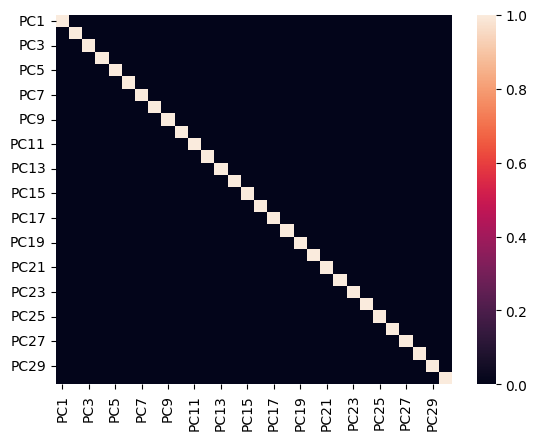

In [354]:
# get heatmap of correlation between unigram features before PCA
unigram_transformed = unigram_classifier.pipeline.named_steps['unigram'].fit_transform(train["text"])
pca_transformed = unigram_classifier.pipeline.named_steps['pca'].fit_transform(unigram_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

Heatmap shows little correlation, no need to reduce dimension with PCA

In [384]:
# Try first with no dimensionality reduction
bigram_classifier = BigramClassifierPipeline(n_components=None, max_features=config["bigram_features"], random_state=config["bigram_random_state"])

bigram_classifier.fit(train["text"], train["Target"])
bigram_predictions = bigram_classifier.predict(test["text"])

acc_score = accuracy_score(test['Target'], bigram_predictions)
prec_score = precision_score(test['Target'], bigram_predictions)
rec_score = recall_score(test['Target'], bigram_predictions)
ami_score = adjusted_mutual_info_score(test['Target'], bigram_predictions)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Bigram classifier
description: Bigram classifier with no dimensionality reduction
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/bigram_classifier.yaml

BigramClassifierPipeline initialized with PCA None components and CountVectorizer 30 max features
Accuracy score:  0.888
Precision score:  0.9290369297610427
Recall score:  0.8435239973701513
Adjusted Mutual Information score:  0.5057910292445412
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/bigram_classifier.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.491765,0.493182,0.162189,0.657924,-0.017678,-0.041250,0.121624,-0.381950,0.195692,0.097576,...,-0.000066,0.000112,0.000696,-0.000047,5.007701e-13,4.850113e-15,-2.555893e-18,-5.058654e-19,4.883964e-16,2.184027e-20
1,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,-0.005017,-0.000703,-0.000589,0.000073,-9.542785e-15,2.577275e-13,-2.887610e-17,-4.546101e-18,9.125093e-18,1.803054e-20
2,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,-0.005017,-0.000703,-0.000589,0.000073,-1.629804e-14,5.832177e-16,6.808512e-15,1.343152e-15,1.999979e-15,-9.933048e-19
3,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,-0.005017,-0.000703,-0.000589,0.000073,4.372261e-16,-2.947411e-17,1.064263e-17,7.356568e-17,-4.788644e-17,2.063885e-17
4,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,-0.005017,-0.000703,-0.000589,0.000073,4.268850e-16,-2.924272e-17,2.813823e-17,-1.899688e-17,-4.662341e-17,2.821499e-19


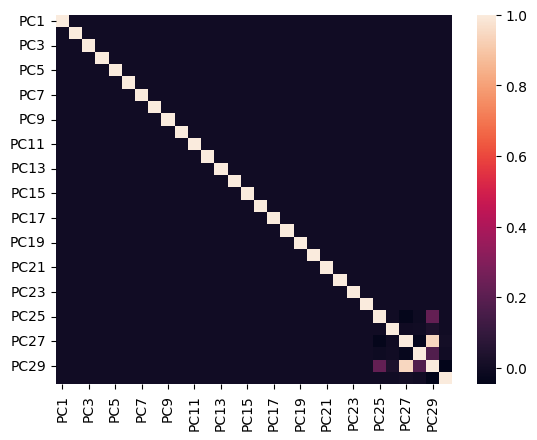

In [358]:
# get heatmap of correlation between bigram features before PCA
bigram_transformed = bigram_classifier.pipeline.named_steps['bigram'].fit_transform(train["text"])
pca_transformed = bigram_classifier.pipeline.named_steps['pca'].fit_transform(bigram_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

In [385]:
# Reduce dimensionality from 30 to 25
bigram_classifier_pca = BigramClassifierPipeline(n_components=25, max_features=config["bigram_features"], random_state=config["bigram_random_state"])

bigram_classifier_pca.fit(train["text"], train["Target"])
bigram_predictions_pca = bigram_classifier_pca.predict(test["text"])

acc_score = accuracy_score(test['Target'], bigram_predictions_pca)
prec_score = precision_score(test['Target'], bigram_predictions_pca)
rec_score = recall_score(test['Target'], bigram_predictions_pca)
ami_score = adjusted_mutual_info_score(test['Target'], bigram_predictions_pca)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Bigram classifier
description: Bigram classifier with dimensionality reduction (80%)
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/bigram_classifier_pca.yaml

BigramClassifierPipeline initialized with PCA 25 components and CountVectorizer 30 max features
Accuracy score:  0.888
Precision score:  0.9290369297610427
Recall score:  0.8435239973701513
Adjusted Mutual Information score:  0.5057910292445412
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/bigram_classifier_pca.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.491765,0.493182,0.162189,0.657924,-0.017678,-0.041250,0.121624,-0.381950,0.195692,0.097576,...,0.005076,0.004490,0.000268,0.000473,-0.002324,-0.000066,0.000112,0.000696,-0.000047,5.007701e-13
1,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,0.000302,-0.019129,-0.008406,0.008608,0.005074,-0.005017,-0.000703,-0.000589,0.000073,-9.542785e-15
2,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,0.000302,-0.019129,-0.008406,0.008608,0.005074,-0.005017,-0.000703,-0.000589,0.000073,-1.629804e-14
3,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,0.000302,-0.019129,-0.008406,0.008608,0.005074,-0.005017,-0.000703,-0.000589,0.000073,4.372261e-16
4,-0.045408,-0.439297,0.091124,-0.050934,-0.018992,0.026916,-0.028563,-0.051465,-0.196501,0.036099,...,0.000302,-0.019129,-0.008406,0.008608,0.005074,-0.005017,-0.000703,-0.000589,0.000073,4.268850e-16


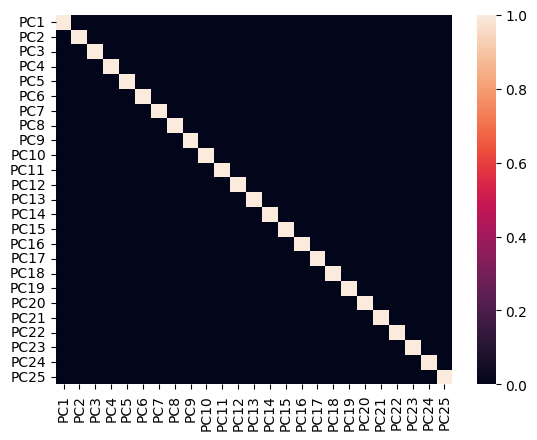

In [386]:
# get heatmap of correlation between bigram features after PCA
bigram_transformed = bigram_classifier_pca.pipeline.named_steps['bigram'].fit_transform(train["text"])
pca_transformed = bigram_classifier_pca.pipeline.named_steps['pca'].fit_transform(bigram_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

In [387]:
# Try first with no dimensionality reduction, degree 2
polynomial_classifier = PolynomialClassifierPipeline(n_components=None, degree=2, random_state=config["polynomial_random_state"])

polynomial_classifier.fit(train.drop(["Target", "text"], axis=1), train["Target"])
polynomial_predictions = polynomial_classifier.predict(test.drop(["Target", "text"], axis=1))

acc_score = accuracy_score(test['Target'], polynomial_predictions)
prec_score = precision_score(test['Target'], polynomial_predictions)
rec_score = recall_score(test['Target'], polynomial_predictions)
ami_score = adjusted_mutual_info_score(test['Target'], polynomial_predictions)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Polynomial classifier
description: Polynomial classifier with no dimensionality reduction
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/polynomial_classifier.yaml

PolynomialClassifierPipeline initialized with PCA None components and Degree 2
Accuracy score:  0.8846666666666667
Precision score:  1.0
Recall score:  0.7725180802103879
Adjusted Mutual Information score:  0.5835539836388463
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/polynomial_classifier.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.601861e+07,-2783.077052,-251.638569,0.895958,-0.067265,-0.578728,-0.183207,-0.021620,2.550724e-13,-0.0
1,-9.874210e+07,5066.910286,754.509669,0.577205,-0.100468,1.370745,-0.946238,-0.021218,-5.161633e-16,-0.0
2,-9.821066e+07,3991.976605,164.282755,-2.081283,-0.110389,-0.099329,0.200845,-0.069391,2.657867e-14,0.0
3,-9.874210e+07,5066.910557,754.507077,-2.532772,-0.099837,1.312370,-0.576184,0.412007,3.335355e-17,0.0
4,-9.846647e+07,4286.269733,326.086891,-2.190839,-0.116242,-0.110513,0.207074,-0.073693,1.159933e-17,0.0


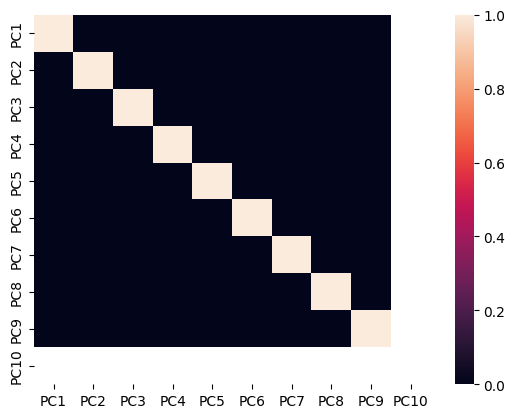

In [388]:
# get heatmap of correlation between polynomial features before PCA
polynomial_transformed = polynomial_classifier.pipeline.named_steps['polynomial'].fit_transform(train.drop(["Target", "text"], axis=1))
pca_transformed = polynomial_classifier.pipeline.named_steps['pca'].fit_transform(polynomial_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

Heatmap shows little correlation, no need to reduce dimension with PCA

In [389]:
# Try first with no dimensionality reduction
proper_noun_classifier = ProperNounClassifierPipeline(n_components=None, random_state=config["proper_noun_random_state"])

proper_noun_classifier.fit(train["text"], train["Target"])
proper_noun_predictions = proper_noun_classifier.predict(test["text"])

acc_score = accuracy_score(test['Target'], proper_noun_predictions)
prec_score = precision_score(test['Target'], proper_noun_predictions)
rec_score = recall_score(test['Target'], proper_noun_predictions)
ami_score = adjusted_mutual_info_score(test['Target'], proper_noun_predictions)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Proper noun classifier
description: Proper noun classifier with no dimensionality reduction
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/proper_noun_classifier.yaml

ProperNounClassifierPipeline initialized with PCA None components and CountVectorizer 30 max features


[nltk_data] Downloading package punkt to /Users/fortune/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fortune/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy score:  0.83
Precision score:  0.8719646799116998
Recall score:  0.7790927021696252
Adjusted Mutual Information score:  0.35073989586701343
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/proper_noun_classifier.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.009356,-0.166393,0.144017,0.082067,0.057080,0.169713,0.005879,-0.044648,0.019379,-0.134402,...,-0.024428,0.001273,0.007998,-0.004721,-0.002595,-0.000469,-0.002181,0.000013,-0.000013,4.103407e-15
1,-0.484220,-0.546624,-0.210198,-0.090527,-0.292741,0.408299,-0.199421,0.378885,-0.048040,0.101544,...,-0.001513,-0.003712,-0.003923,-0.001548,-0.004475,-0.004136,-0.003695,-0.000241,-0.000508,-8.786990e-15
2,-0.009356,-0.166393,0.144017,0.082067,0.057080,0.169713,0.005879,-0.044648,0.019379,-0.134402,...,-0.024428,0.001273,0.007998,-0.004721,-0.002595,-0.000469,-0.002181,0.000013,-0.000013,2.465149e-14
3,-0.484220,-0.546624,-0.210198,-0.090527,-0.292741,0.408299,-0.199421,0.378885,-0.048040,0.101544,...,-0.001513,-0.003712,-0.003923,-0.001548,-0.004475,-0.004136,-0.003695,-0.000241,-0.000508,-6.997691e-18
4,-0.009356,-0.166393,0.144017,0.082067,0.057080,0.169713,0.005879,-0.044648,0.019379,-0.134402,...,-0.024428,0.001273,0.007998,-0.004721,-0.002595,-0.000469,-0.002181,0.000013,-0.000013,-1.531738e-17


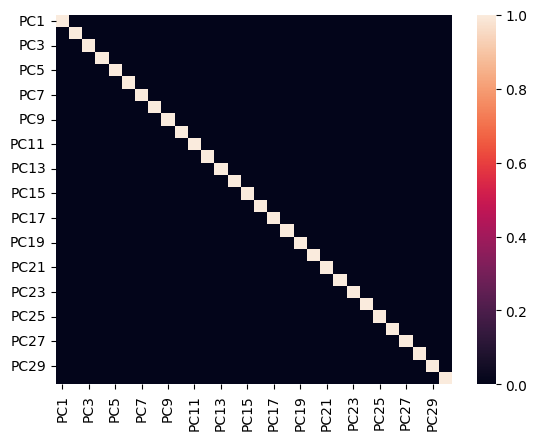

In [390]:
# get heatmap of correlation between proper noun features before PCA
proper_noun_transformed = proper_noun_classifier.pipeline.named_steps['proper_noun'].fit_transform(train["text"])
unigram_transformed = proper_noun_classifier.pipeline.named_steps['unigram'].fit_transform(proper_noun_transformed)
pca_transformed = proper_noun_classifier.pipeline.named_steps['pca'].fit_transform(unigram_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

In [391]:
noun_phrase_classifier = NounPhraseClassifierPipeline(n_components=None, random_state=config["noun_phrase_random_state"])

noun_phrase_classifier.fit(train["text"], train["Target"])
noun_phrase_predictions = noun_phrase_classifier.predict(test["text"])

acc_score = accuracy_score(test['Target'], noun_phrase_predictions)
prec_score = precision_score(test['Target'], noun_phrase_predictions)
rec_score = recall_score(test['Target'], noun_phrase_predictions)
ami_score = adjusted_mutual_info_score(test['Target'], noun_phrase_predictions)

print("Accuracy score: ", acc_score)
print("Precision score: ", prec_score)
print("Recall score: ", rec_score)
print("Adjusted Mutual Information score: ", ami_score)

# Store results in yaml file using writefile magic
yaml_content = f"""
name: Noun phrase classifier
description: Noun phrase classifier with no dimensionality reduction
accuracyScore: {acc_score}
precisionScore: {prec_score}
recallScore: {rec_score}
amiScore: {ami_score}
"""

%store yaml_content >experiments/exp_hw9/noun_phrase_classifier.yaml

NounPhraseClassifierPipeline initialized with PCA None components and CountVectorizer 30 max features


[nltk_data] Downloading package punkt to /Users/fortune/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fortune/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy score:  0.7676666666666667
Precision score:  0.9449244060475162
Recall score:  0.5752794214332676
Adjusted Mutual Information score:  0.30251190357541113
Writing 'yaml_content' (str) to file 'experiments/exp_hw9/noun_phrase_classifier.yaml'.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.450301,0.026104,-0.005209,-0.035069,-0.028846,-0.024863,-0.044894,0.001717,-0.024445,-0.004685,...,0.024112,-0.032213,-0.028149,-0.032172,-0.005045,0.001413,-0.000447,0.000312,-0.000182,1.220602e-15
1,0.450301,0.026104,-0.005209,-0.035069,-0.028846,-0.024863,-0.044894,0.001717,-0.024445,-0.004685,...,0.024112,-0.032213,-0.028149,-0.032172,-0.005045,0.001413,-0.000447,0.000312,-0.000182,-8.814607e-17
2,-0.500385,-0.201734,0.014411,0.083895,-0.107968,0.000494,-0.000163,-0.074924,0.003300,-0.006690,...,-0.010005,-0.002349,-0.039892,-0.008178,-0.006266,0.002309,0.000171,-0.000278,0.000140,-8.819171e-16
3,-0.500385,-0.201734,0.014411,0.083895,-0.107968,0.000494,-0.000163,-0.074924,0.003300,-0.006690,...,-0.010005,-0.002349,-0.039892,-0.008178,-0.006266,0.002309,0.000171,-0.000278,0.000140,-7.688728e-17
4,-0.500385,-0.201734,0.014411,0.083895,-0.107968,0.000494,-0.000163,-0.074924,0.003300,-0.006690,...,-0.010005,-0.002349,-0.039892,-0.008178,-0.006266,0.002309,0.000171,-0.000278,0.000140,-1.118722e-16


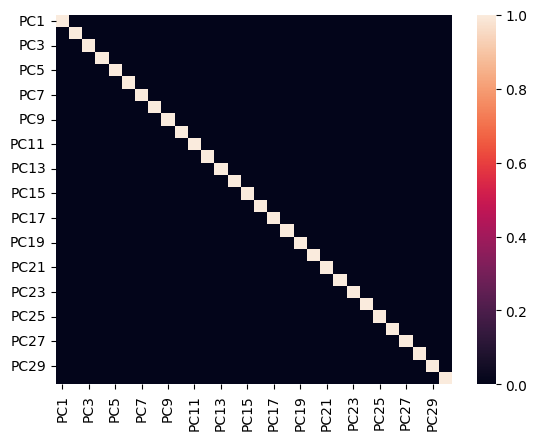

In [392]:
# get heatmap of correlation between noun phrase features before PCA
noun_phrase_transformed = noun_phrase_classifier.pipeline.named_steps['noun_phrase'].fit_transform(train["text"])
unigram_transformed = noun_phrase_classifier.pipeline.named_steps['unigram'].fit_transform(noun_phrase_transformed)
pca_transformed = noun_phrase_classifier.pipeline.named_steps['pca'].fit_transform(unigram_transformed)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{x}' for x in range(1, pca_transformed.shape[1] + 1)])
sns.heatmap(pca_df.corr())
pca_df.head()

#### HW 10*: Read urls on dataset follow them with the following example, download attached images and count people on them with cv features

In [301]:
import cv2

im = cv2.imread('data/exp_hw10/ML_folks.jpg')


#### HW 11: Add new features to all PCA output on HW 6, train classifiers, test quality and store results in proper .yaml files

#### HW 12*: Perform topic modelings on text feature, add it to PCA features from HW 6, train classifiers, test quality and store results in proper .yaml files

#### HW 13: Combine all combinations of features from HW6, measure the results of improvement of classifier

#### HW 14*: For 5 best of prevous experiments, change LinearRegression to XGBClassifier. Try several XGB configurations, store results and parameters in .yaml files

In [378]:
# Ignore this cell, it is for reloading modules

import importlib
importlib.reload(experiments.exp_hw5.unigram)
importlib.reload(experiments.exp_hw5.bigram)
importlib.reload(experiments.exp_hw5.noun_phrase)
importlib.reload(experiments.exp_hw5.proper_noun)
importlib.reload(experiments.exp_hw5.polynomial)
importlib.reload(experiments.exp_hw6.unigram)
importlib.reload(experiments.exp_hw6.bigram)
importlib.reload(experiments.exp_hw6.noun_phrase)
importlib.reload(experiments.exp_hw6.proper_noun)
importlib.reload(experiments.exp_hw6.polynomial)

from experiments.exp_hw5.unigram import UnigramTransformer
from experiments.exp_hw5.noun_phrase import NounPhraseTransformer
from experiments.exp_hw5.proper_noun import ProperNounTransformer
from experiments.exp_hw5.bigram import BigramTransformer
from experiments.exp_hw5.polynomial import PolynomialTransformer

from experiments.exp_hw6.unigram import UnigramClassifierPipeline
from experiments.exp_hw6.noun_phrase import NounPhraseClassifierPipeline
from experiments.exp_hw6.proper_noun import ProperNounClassifierPipeline
from experiments.exp_hw6.bigram import BigramClassifierPipeline
from experiments.exp_hw6.polynomial import PolynomialClassifierPipeline